In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
data = {
"Income": ["High", "Medium", "Low", "High", "Low", "Medium", "Medium",
"High"],
"Credit Score": ["Good", "Good", "Good", "Bad", "Bad", "Bad", "Good",
"Good"],
"Collateral": ["Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No"],
"Loan Approved": ["Yes", "Yes", "No", "No", "No", "No", "Yes", "Yes"]
}

In [3]:
df = pd.DataFrame(data)
df

,Income,Credit Score,Collateral,Loan Approved
0,High,Good,Yes,Yes
1,Medium,Good,Yes,Yes
2,Low,Good,No,No
3,High,Bad,Yes,No
4,Low,Bad,Yes,No
5,Medium,Bad,No,No
6,Medium,Good,No,Yes
7,High,Good,No,Yes


In [4]:
le = LabelEncoder()

In [5]:
for i in df.columns:
    df[i] = le.fit_transform(df[i])
df

,Income,Credit Score,Collateral,Loan Approved
0,0,1,1,1
1,2,1,1,1
2,1,1,0,0
3,0,0,1,0
4,1,0,1,0
5,2,0,0,0
6,2,1,0,1
7,0,1,0,1


In [6]:
x = df[['Income','Credit Score','Collateral']]
y = df['Loan Approved']

In [7]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
model

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [8]:
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

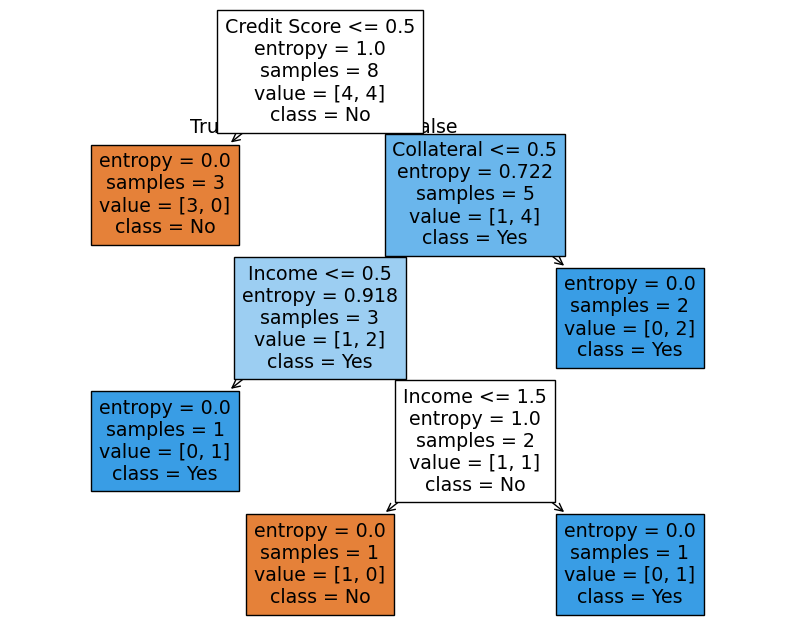

In [9]:
mp.figure(figsize = (10,8))
tree.plot_tree(model , feature_names = ['Income','Credit Score','Collateral'],class_names = ['No','Yes'], filled = True)
mp.show()

In [10]:
test_data = pd.DataFrame({"Income": [le.fit_transform(data["Income"])[0]],"Credit Score": [le.fit_transform(data["Credit Score"])[0]],"Collateral": [le.fit_transform(data["Collateral"])[0]]})
test_data

,Income,Credit Score,Collateral
0,0,1,1


In [11]:
pred = model.predict(test_data)
pred

array([1])

In [15]:
print("Prediction (Loan Approved):", le.inverse_transform(pred)[0])

Prediction (Loan Approved): Yes
